<a href="https://colab.research.google.com/github/tytybella/Amazon_review_nlp/blob/lei/bert_models_ipynb_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.0 Imports

In [1]:
# A dependency of the preprocessing for BERT inputs
!pip install -U "tensorflow-text==2.13.*"

!pip install "tf-models-official==2.13.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 13.6 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 0.4.6
    Uninstalling google-auth-oauthlib-0.4.6:
      Successfully uninstalled google-auth-oauthlib-0.4.6
  Attempting uninstall: tens

In [2]:
!pip uninstall tensorflow tensorflow-hub
!pip install tensorflow tensorflow-hub


Found existing installation: tensorflow 2.13.1
Uninstalling tensorflow-2.13.1:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.13.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? Y
  Successfully uninstalled tensorflow-2.13.1
Found existing installation: tensorflow-hub 0.15.0
Uninstalling tensorflow-hub-0.15.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/tensorflow_hub-0.15.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow_hub/*
Proceed (Y/n)? Y
  Successfully uninstalled tensorflow-hub-0.15.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [9]:
!pip install tf-models-official


  Using cached tensorflow_text-2.13.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.5 MB)
  Using cached tensorflow-2.13.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (479.7 MB)
  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Using cached tensorflow_estimator-2.13.0-py2.py3-none-any.whl (440 kB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.3
    Uninstalling tensorboard-2.12.3:
      Successfully uninstalled tensorboard-2.12.3
  Attempting uninstall: tensorflow
    Found existing installation:

# 0. Import libraries

In [2]:
import tensorflow as tf
print(tf.__version__)

2.13.1


In [6]:
!pip install --upgrade tensorflow

In [3]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

# 1. Download datasets from Box link

In [4]:
!wget https://tufts.box.com/shared/static/9tcv9p4zc1q9d5fb80weqtvm2los1len.zip -O bert_same_data.zip
!wget https://tufts.box.com/shared/static/65lzdmpyito0c98gt89nktjrnuvrsjdm.zip -O bert_basic_data.zip

--2023-12-09 22:03:51--  https://tufts.box.com/shared/static/9tcv9p4zc1q9d5fb80weqtvm2los1len.zip
Resolving tufts.box.com (tufts.box.com)... 74.112.186.144
Connecting to tufts.box.com (tufts.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/9tcv9p4zc1q9d5fb80weqtvm2los1len.zip [following]
--2023-12-09 22:03:51--  https://tufts.box.com/public/static/9tcv9p4zc1q9d5fb80weqtvm2los1len.zip
Reusing existing connection to tufts.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://tufts.app.box.com/public/static/9tcv9p4zc1q9d5fb80weqtvm2los1len.zip [following]
--2023-12-09 22:03:51--  https://tufts.app.box.com/public/static/9tcv9p4zc1q9d5fb80weqtvm2los1len.zip
Resolving tufts.app.box.com (tufts.app.box.com)... 74.112.186.144
Connecting to tufts.app.box.com (tufts.app.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https:/

In [5]:
!unzip bert_same_data.zip -d bert_same_data
!unzip bert_basic_data.zip -d bert_basic_data

Archive:  bert_same_data.zip
replace bert_same_data/content/bert_same_data/train/class_1/26633.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  bert_basic_data.zip
replace bert_basic_data/content/bert_basic_data/train/class_1/16472.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [6]:
!pwd

/content


In [7]:
!ls

bert_basic_data  bert_basic_data.zip  bert_same_data  bert_same_data.zip  sample_data


In [8]:
!ls /content/bert_basic_data/content/bert_basic_data

test  train  validation


In [9]:
!ls bert_basic_data

content


# 3. Define Bert class and plot function

The plot_acc_loss function can plot each epochs result (since I dont have GPUs... I only tried epochs=1) ---For visualization ,can choose epoch as 5 and plot the curve again.


In [10]:

AUTOTUNE = tf.data.AUTOTUNE  # instruct TensorFlow to adjust the parameter values (batches/buffer sizes) based on current runtime environment to optimize CPU/GPU utilization.
batch_size = 64
seed = 42


In [22]:
class BertModel:
    def __init__(self, bert_model_name, train_ds, val_ds, test_ds):
      self.train_ds = train_ds
      self.val_ds = val_ds
      self.test_ds = test_ds
      self.tfhub_handle_encoder = map_name_to_handle[bert_model_name]
      self.tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]
      self.classifier_model = None
      self.loss, self.metrics = self.loss_function()
      self.optimizer = self.optimizer()
      self.history = None         # for plot using

    def build_classifier_model(self):
      '''build classifier model'''
      text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
      preprocessing_layer = hub.KerasLayer(self.tfhub_handle_preprocess, name='preprocessing')
      encoder_inputs = preprocessing_layer(text_input)
      encoder = hub.KerasLayer(self.tfhub_handle_encoder, trainable=True, name='BERT_encoder')
      outputs = encoder(encoder_inputs)
      net = outputs['pooled_output']
      net = tf.keras.layers.Dropout(0.1)(net)
      net = tf.keras.layers.Dense(3, activation='softmax', name='classifier')(net)  # Change here
      self.classifier_model = tf.keras.Model(text_input, net)


    def show_model_structure(self):
      '''show model's structure '''
      print(tf.keras.utils.plot_model(classifier_model))

    def loss_function(self):
      '''multi-class classification problem, use losses.CategoricalCrossentropy or SparseCategoricalCrossentropy'''
      loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)  # or CategoricalCrossentropy if one-hot
      metrics = tf.metrics.SparseCategoricalAccuracy()  # or CategoricalAccuracy if one-hot
      return loss, metrics

    def optimizer(self, epochs=5, init_lr=3e-5, warmup_rate=0.1, optimizer_type='adamw'):
      '''configures the training optimizer '''
      steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
      num_train_steps = steps_per_epoch * epochs
      num_warmup_steps = int(warmup_rate * num_train_steps)
      optimizer = optimization.create_optimizer(init_lr=init_lr,
                                                num_train_steps=num_train_steps,
                                                num_warmup_steps=num_warmup_steps,
                                                optimizer_type=optimizer_type)
      return optimizer


    def compile_model(self):
      '''compile model with defined loss, metric and optimizer.'''
      self.classifier_model.compile(optimizer=self.optimizer,
                               loss=self.loss,
                               metrics=self.metrics)

    def train(self, epochs=1):
      '''train model'''
      print(f'Training model with {self.tfhub_handle_encoder}')
      self.history = self.classifier_model.fit(x=self.train_ds,
                                               validation_data=self.val_ds,
                                               epochs=epochs)

    def evaluate(self):
      '''evaluate model and print accutacy ans loss'''
      loss, accuracy = self.classifier_model.evaluate(self.test_ds)
      print(f'Loss: {loss}')
      print(f'Accuracy: {accuracy}')

### The plot_acc_loss function can plot each epochs result (since I dont have GPUs... I only tried epochs=1) ---For visualization ,can choose epoch as 5 and plot the curve again.

In [12]:
import matplotlib.pyplot as plt

def plot_acc_loss(history):
    acc = history['sparse_categorical_accuracy']
    val_acc = history['val_sparse_categorical_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']

    epochs = range(1, len(acc) + 1)
    fig = plt.figure(figsize=(10, 6))
    fig.tight_layout()

    plt.subplot(2, 1, 1)
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    plt.show()


# 4. Choose bert model

In [13]:
#@title Choose a BERT model to fine-tune

bert_model_name = 'small_bert/bert_en_uncased_L-4_H-768_A-12'  #@param ["bert_en_uncased_L-12_H-768_A-12", "bert_en_cased_L-12_H-768_A-12", "bert_multi_cased_L-12_H-768_A-12", "small_bert/bert_en_uncased_L-2_H-128_A-2", "small_bert/bert_en_uncased_L-2_H-256_A-4", "small_bert/bert_en_uncased_L-2_H-512_A-8", "small_bert/bert_en_uncased_L-2_H-768_A-12", "small_bert/bert_en_uncased_L-4_H-128_A-2", "small_bert/bert_en_uncased_L-4_H-256_A-4", "small_bert/bert_en_uncased_L-4_H-512_A-8", "small_bert/bert_en_uncased_L-4_H-768_A-12", "small_bert/bert_en_uncased_L-6_H-128_A-2", "small_bert/bert_en_uncased_L-6_H-256_A-4", "small_bert/bert_en_uncased_L-6_H-512_A-8", "small_bert/bert_en_uncased_L-6_H-768_A-12", "small_bert/bert_en_uncased_L-8_H-128_A-2", "small_bert/bert_en_uncased_L-8_H-256_A-4", "small_bert/bert_en_uncased_L-8_H-512_A-8", "small_bert/bert_en_uncased_L-8_H-768_A-12", "small_bert/bert_en_uncased_L-10_H-128_A-2", "small_bert/bert_en_uncased_L-10_H-256_A-4", "small_bert/bert_en_uncased_L-10_H-512_A-8", "small_bert/bert_en_uncased_L-10_H-768_A-12", "small_bert/bert_en_uncased_L-12_H-128_A-2", "small_bert/bert_en_uncased_L-12_H-256_A-4", "small_bert/bert_en_uncased_L-12_H-512_A-8", "small_bert/bert_en_uncased_L-12_H-768_A-12", "albert_en_base", "electra_small", "electra_base", "experts_pubmed", "experts_wiki_books", "talking-heads_base"]

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


# 5. Train bert model on the same train, val, test dataset with previous models

( only did basic cleaning, like removing HTML tags, URLs, retained stopwords, numsbers, punctutaions, ect)

(not enough computation resouce, used a smaller sample to do this)

### ** Note! This mode can still be improved, such as: try smaller batch size ... ...but I don't have more GPU.. **

In [14]:
train_ds = tf.keras.utils.text_dataset_from_directory(
    '/content/bert_same_data/content/bert_same_data/train',
    batch_size=batch_size)
class_names = train_ds.class_names
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)

val_ds = tf.keras.utils.text_dataset_from_directory(
    '/content/bert_same_data/content/bert_same_data/validation',
    batch_size=batch_size)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


test_ds = tf.keras.utils.text_dataset_from_directory(
    '/content/bert_same_data/content/bert_same_data/test',
    batch_size=batch_size)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 42962 files belonging to 3 classes.
Found 8592 files belonging to 3 classes.
Found 5729 files belonging to 3 classes.


In [23]:
## dataset too large, do not have enough computation resource, use a smaller sample instead
train_sample_size = 7500
val_sample_size = 1500
test_sample_size = 1000


# bactch size: defined as 64
train_batches = train_sample_size // batch_size
val_batches = val_sample_size // batch_size
test_batches = test_sample_size // batch_size

train_ds = train_ds.take(train_batches)
val_ds = val_ds.take(val_batches)
test_ds = test_ds.take(test_batches)



In [ ]:
train_ds.sample(5)
val_ds.sample(5)
test_ds.sample(5)

In [30]:
## test
train_sample_size = 750
val_sample_size = 150
test_sample_size = 100


# bactch size: defined as 64
train_batches = train_sample_size // batch_size
val_batches = val_sample_size // batch_size
test_batches = test_sample_size // batch_size

train_ds = train_ds.take(train_batches)
val_ds = val_ds.take(val_batches)
test_ds = test_ds.take(test_batches)

In [31]:
# this block runs for 3 hours and half

bert_model = BertModel(bert_model_name, train_ds, val_ds, test_ds)
bert_model.build_classifier_model()
# bert_model.show_model_structure()
bert_model.compile_model()
bert_model.train(epochs = 5)
print("Evaluate model and show result:")
bert_model.evaluate()

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


11/11 [==============================] - 482s 43s/step - loss: 0.9194 - sparse_categorical_accuracy: 0.6094 - val_loss: 0.9054 - val_sparse_categorical_accuracy: 0.6953
Epoch 2/5
11/11 [==============================] - 454s 42s/step - loss: 0.7335 - sparse_categorical_accuracy: 0.7273 - val_loss: 0.6956 - val_sparse_categorical_accuracy: 0.7344
Epoch 3/5
11/11 [==============================] - 455s 42s/step - loss: 0.6283 - sparse_categorical_accuracy: 0.7571 - val_loss: 0.6596 - val_sparse_categorical_accuracy: 0.7266
Epoch 4/5
11/11 [==============================] - 453s 42s/step - loss: 0.6081 - sparse_categorical_accuracy: 0.7486 - val_loss: 0.5323 - val_sparse_categorical_accuracy: 0.8125
Epoch 5/5
11/11 [==============================] - 454s 42s/step - loss: 0.5628 - sparse_categorical_accuracy: 0.7926 - val_loss: 0.5530 - val_sparse_categorical_accuracy: 0.7969
Evaluate model and show result:
1/1 [==============================] - 10s 10s/step - loss: 0.6522 - sparse_categor

In [32]:
print(bert_model.history.history.keys())

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


In [33]:
print(bert_model.history.history.values())

dict_values([[0.9194457530975342, 0.7334556579589844, 0.6282821893692017, 0.6080524921417236, 0.5627771019935608], [0.609375, 0.7272727489471436, 0.7571022510528564, 0.7485795617103577, 0.7926136255264282], [0.905434250831604, 0.69560706615448, 0.6596198678016663, 0.532339334487915, 0.553044855594635], [0.6953125, 0.734375, 0.7265625, 0.8125, 0.796875]])


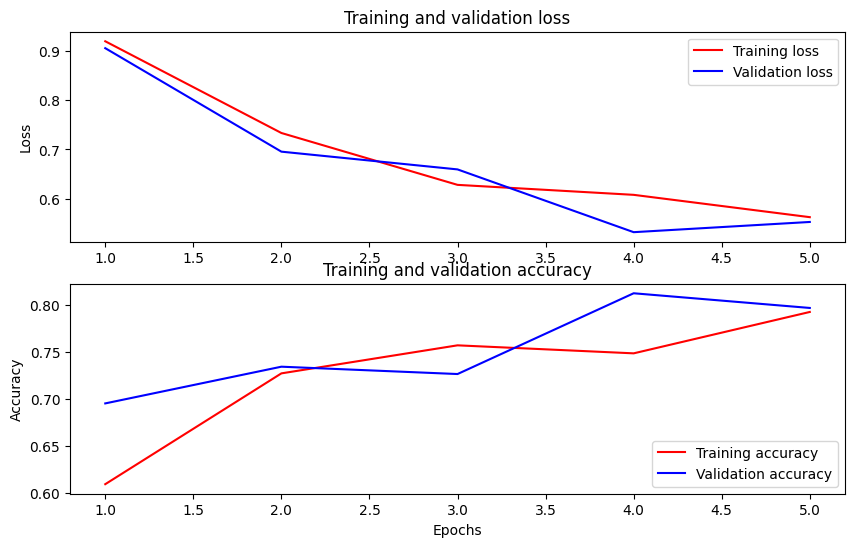

In [34]:
# if increase epochs, the curves will show
plot_acc_loss(bert_model.history.history)

# 6. Train bert model on recleaned (basic cleaning) text

In [35]:
train_ds2 = tf.keras.utils.text_dataset_from_directory(
    '/content/bert_basic_data/content/bert_basic_data/train',
    batch_size=batch_size)
class_names = train_ds2.class_names
train_ds2 = train_ds2.cache().prefetch(buffer_size=AUTOTUNE)

val_ds2 = tf.keras.utils.text_dataset_from_directory(
    '/content/bert_basic_data/content/bert_basic_data/validation',
    batch_size=batch_size)
val_ds2 = val_ds2.cache().prefetch(buffer_size=AUTOTUNE)


test_ds2 = tf.keras.utils.text_dataset_from_directory(
    '/content/bert_basic_data/content/bert_basic_data/test',
    batch_size=batch_size)
test_ds2 = test_ds2.cache().prefetch(buffer_size=AUTOTUNE)

Found 43047 files belonging to 3 classes.
Found 8610 files belonging to 3 classes.
Found 5740 files belonging to 3 classes.


In [36]:
## dataset too large, do not have enough computation resource, use a smaller sample instead
train_sample_size = 750 #0
val_sample_size = 150 #0
test_sample_size = 100 #0


# bactch size: defined as 64
train_batches = train_sample_size // batch_size
val_batches = val_sample_size // batch_size
test_batches = test_sample_size // batch_size

train_ds2 = train_ds2.take(train_batches)
val_ds2 = val_ds2.take(val_batches)
test_ds2 = test_ds2.take(test_batches)

In [39]:
# this block runs for 45+ mins
bert_model2 = BertModel(bert_model_name, train_ds2, val_ds2, test_ds2)
bert_model2.build_classifier_model()
# bert_model.show_model_structure()
bert_model2.compile_model()
bert_model2.train(epochs = 5)
print("Evaluate model and show result:")
bert_model2.evaluate()

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


11/11 [==============================] - 463s 42s/step - loss: 1.2082 - sparse_categorical_accuracy: 0.4503 - val_loss: 0.7601 - val_sparse_categorical_accuracy: 0.7500
Epoch 2/5
11/11 [==============================] - 449s 41s/step - loss: 0.6826 - sparse_categorical_accuracy: 0.7429 - val_loss: 0.6788 - val_sparse_categorical_accuracy: 0.7109
Epoch 3/5
11/11 [==============================] - 444s 41s/step - loss: 0.6061 - sparse_categorical_accuracy: 0.7585 - val_loss: 0.5652 - val_sparse_categorical_accuracy: 0.7656
Epoch 4/5
11/11 [==============================] - 450s 41s/step - loss: 0.5264 - sparse_categorical_accuracy: 0.7713 - val_loss: 0.5371 - val_sparse_categorical_accuracy: 0.7656
Epoch 5/5
11/11 [==============================] - 448s 41s/step - loss: 0.4886 - sparse_categorical_accuracy: 0.8011 - val_loss: 0.6785 - val_sparse_categorical_accuracy: 0.6953
Evaluate model and show result:
1/1 [==============================] - 11s 11s/step - loss: 0.6991 - sparse_categor

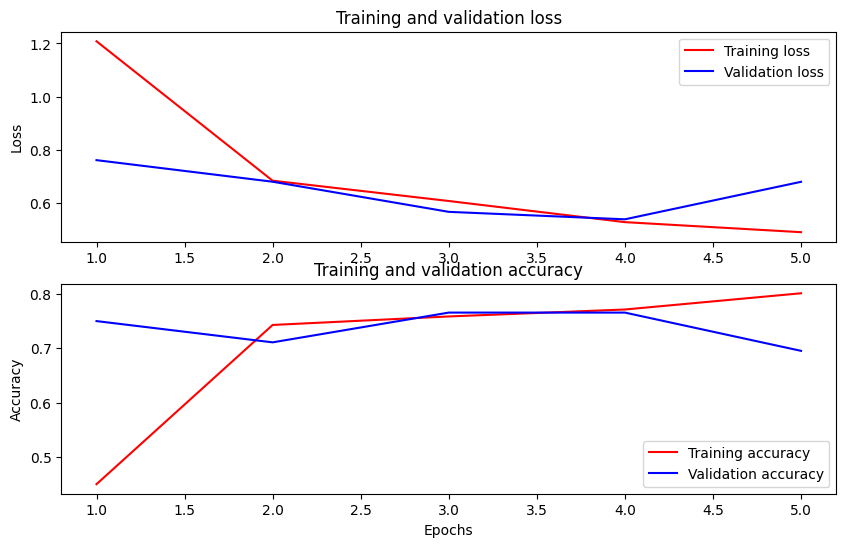

In [40]:
plot_acc_loss(bert_model2.history.history)